In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import linear_model

In [44]:
df= pd.read_csv("homes prices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


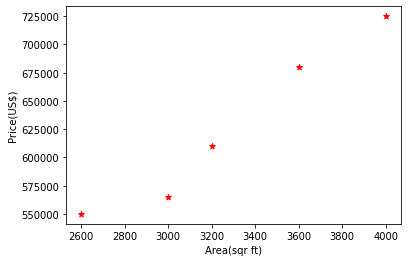

In [45]:
%matplotlib inline
plt.xlabel("Area(sqr ft)")
plt.ylabel("Price(US$)")
#plt.scatter(df.area,df.price, color="red", marker="*")
plt.scatter(df["area"],df["price"], color="red", marker="*")

In [46]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
#reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

In [47]:
reg.predict([[3300]])

c:\users\honey\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [48]:
reg.coef_

array([135.78767123])

## Y = m * X + b (m is coefficient and b is intercept)

In [49]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

# (1) Predict price of a home with area = 5000 sqr ft

In [50]:
print(reg.predict([[5000]]))

[859554.79452055]


c:\users\honey\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Generate CSV file with list of home price prediction

# one more problem

In [51]:
import pandas as pd
df= pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [53]:
import matplotlib.pyplot as plt
from sklearn import linear_model

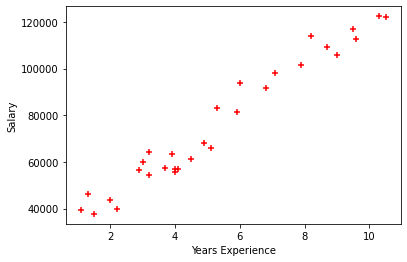

In [54]:
%matplotlib inline
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.scatter(df["YearsExperience"],df["Salary"], color= "red", marker="+")

In [55]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#divide into input and output
x=df.iloc[:,[0]].values
y=df.iloc[:,1].values
model.fit(x,y)

LinearRegression()

In [56]:
model.intercept_

25792.20019866871

In [57]:
model.coef_

array([9449.96232146])

In [58]:
model.predict([[3.5]])

array([58867.06832376])

In [59]:
print(model.predict([[3.5]]))

[58867.06832376]


In [60]:
9449.96232146*3.5 + 25792.200198668696

58867.068323778694

## Using the Pickle
Pickle is used to   save the file of python 

In [61]:
import pickle

In [62]:
with open ("model_pickle",'wb') as f:
  pickle.dump(model,f)

In [63]:
with open("model_pickle","wb") as f:
      mp=pickle.dump(model,f)

In [65]:
mp.predict(5000)

AttributeError: 'NoneType' object has no attribute 'predict'

In [66]:
#https://scikit-learn.org/0.18/modules/model_persistence.html

# joblib


joblib can take file name directly

In [71]:
import joblib as jb

In [75]:
from sklearn.externals import joblib


ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\users\honey\appdata\local\programs\python\python39\lib\site-packages\sklearn\externals\__init__.py)

In [76]:
jb.dump(model,"model_joblib")

['model_joblib']

In [77]:
mj=jb.load("model_joblib")

In [78]:
mj.predict(5000)

ValueError: Expected 2D array, got scalar array instead:
array=5000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.